# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [9]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))


<class 'str'>
120253


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

<function matplotlib.pyplot.show(*args, **kw)>

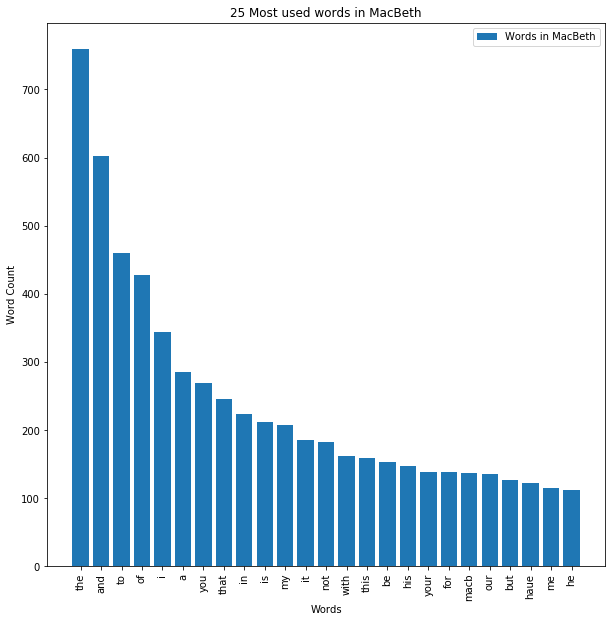

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#annotated Project code

# Begin by getting rid of the different cases and escaped characters before spliting the string

macbethLow = macbeth.lower().replace('\r',' ').replace('\n',' ')

#create an array with all the special characters
specialCharArray = ['!','@','#','#','%','^','&','*','\r','\n','?','+','=','.',',',':',';','[',']','(',')',"\'",'"']

#define function that gets the word counts
def getWordCounts(string):
    stringLow = string.lower()
    #print(stringLow)
    cleanString = [x for x in stringLow if x not in specialCharArray]
    #print(cleanString)
    arrayCleanWords =[x for x in ''.join(cleanString).split(' ') if x not in ['']] 
    #print(arrayCleanWords)
    arrayCleanWordsUnique = list(set(arrayCleanWords))
    #print(arrayCleanWordsUnique)
    listOfWordCounts= [{'word':x,'count':arrayCleanWords.count(x)} for x in arrayCleanWordsUnique]
    #print(listOfWordCounts)
    listOfWordCounts.sort(key=lambda e:e['count'], reverse = True)
    return listOfWordCounts

listOfWordCounts = getWordCounts(macbethLow)
howManyToDisplay = 25
x =[listOfWordCounts[x]['word'] for x in list(range(howManyToDisplay))]
y =[listOfWordCounts[x]['count'] for x in list(range(howManyToDisplay))]
plt.figure(figsize=(10,10))
plt.bar(x,y, label='Words in MacBeth')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.title('25 Most used words in MacBeth')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

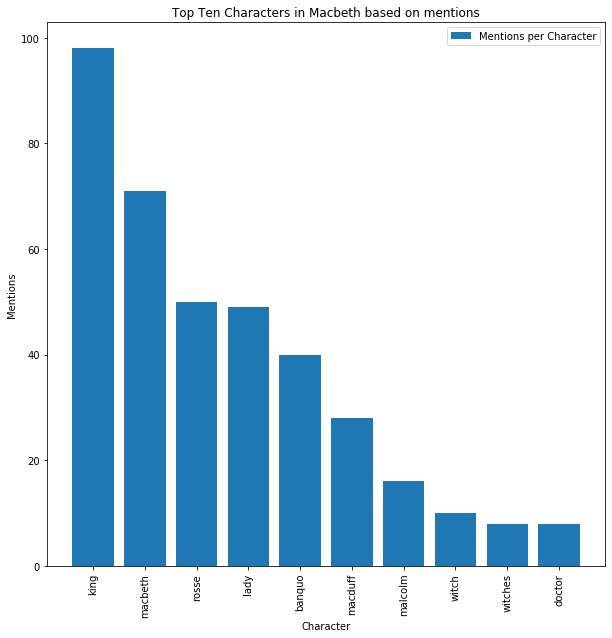

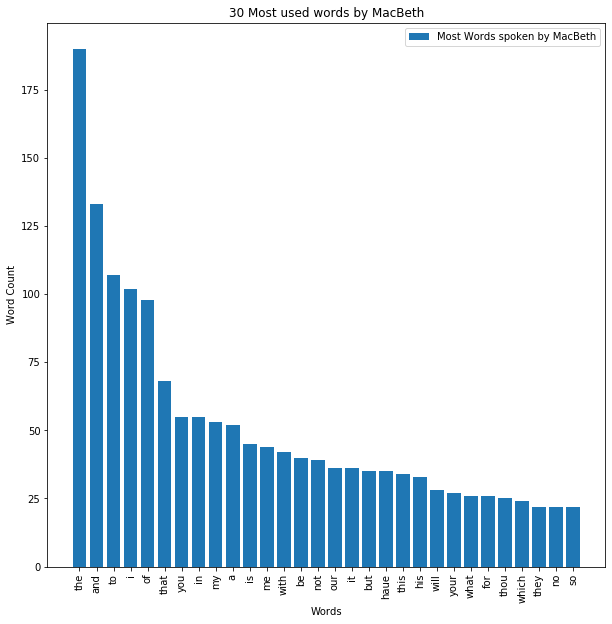

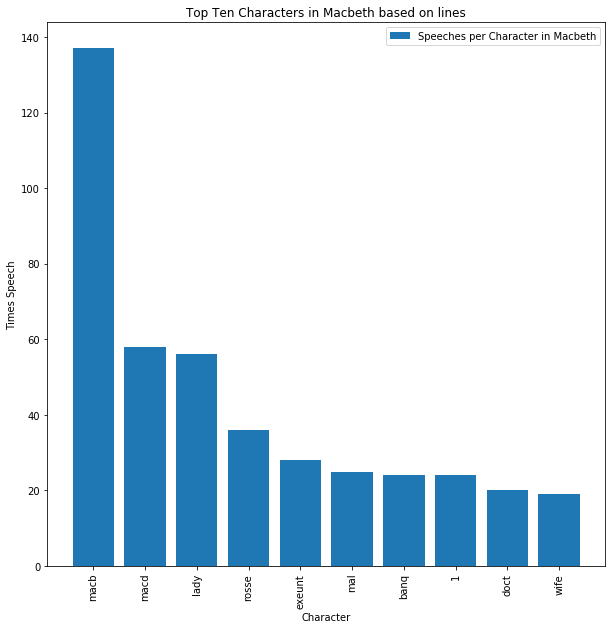

In [8]:
#annotated Level Up Code

#1.) ranking by mentioning 

#create list of characters

charList = ['macbeth','lady','lady macbeth','macduff','king','captain','malcolm','banquo','witch','witches','donalbain','fleance','siward',"macduff's son",'doctor','rosse','lennox']

#because we're not looking to catagorize the words we can just 
#search the original sting minus the escaped characters so we use
#macbethLow from before to create the dictonaries

charMentions= [{'char':x,'count':macbethLow.count(x)} for x in charList]

#sort the list with a function because dictionaries suck

def sortFunc(e):
    return e['count']
charMentions.sort(key=sortFunc, reverse = True)

#generate the graph
howManyToDisplay = 10
x =[charMentions[i]['char'] for i in list(range(howManyToDisplay))]
y =[charMentions[j]['count'] for j in list(range(howManyToDisplay))]
plt.figure(figsize=(10,10))
plt.bar(x,y, label='Mentions per Character')
plt.xticks(rotation=90)
plt.xlabel('Character')
plt.ylabel('Mentions')
plt.title('Top Ten Characters in Macbeth based on mentions')
plt.legend()
plt.show








#2.) Split by character talking

#get rid of the into, a little bit of try and error here

introlength = 16648

#use macbethLow from before. Split based on double spaces which usually 
#denotes when someone starts talking.

byCharDirty=macbethLow[introlength:].split('   ')

#get rid of spaces in list

byCharClean=[]
for x in byCharDirty:
    if x not in [' ','']:
        byCharClean.append(x.strip())

#create dictionary relating characters to their lines
        
characterDict = []
for x in byCharClean:
    for i in list(range(len(x))):
        if x[i] == '.':
            characterDict.append({'char':x[0:i], 'lines':x[i:len(x)]})
            break
        
#sort the dictionary

def sortThing(e):
    return e['char']
characterDict.sort(key=sortThing)

#create a list of the names as they appear in the script

newCharList = ['macb', 'macd', 'la','lady','banq','king','rosse','1','2','3','mal','malc', 'cap','mur','lenox','all','lord', 'lords','son','wife']

#create a new dictonary compressing all the lines into one object per individual
allCharLines = [{'char':newCharList[i], 'lines':[x['lines'] for x in characterDict if x['char'] == newCharList[i]]} for i in list(range(len(newCharList))) ]

#so allCharLines is a list with dictionaries associating each character to all of their lines






#3.) Most Word by character

#start where we left off
#use the method from the main project to sort the words by individual

allCharWordCounts = [{'char':newCharList[i], 'wordCounts':getWordCounts(''.join([x['lines'] for x in characterDict if x['char'] == newCharList[i]]))} for i in list(range(len(newCharList))) ]
#print(allCharWordCounts)

#now that we have all the word counts for individual characters it's just a matter of displaying them


#Create the bar graph
#use the index of the character after allCharWordCounts
howManyToDisplay = 30
x =[allCharWordCounts[0]['wordCounts'][x]['word'] for x in list(range(howManyToDisplay))]
y =[allCharWordCounts[0]['wordCounts'][x]['count'] for x in list(range(howManyToDisplay))]
plt.figure(figsize=(10,10))
plt.bar(x,y, label='Most Words spoken by MacBeth')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.title('30 Most used words by MacBeth')
plt.legend()
plt.show






#4.) Most lines per character, I haven't cleaned this one up

#get rid of the into
introlength = 16648
#use macbethLow from before. Split based on spaces
thing1=macbethLow[introlength:].split('  ')
thing2=[]
for x in thing1:
    if x not in [' ']:
        thing2.append(x)
thing3=[]
for x in thing2:
    for i in list(range(len(x))):
        if x[i] == '.':
            thing3.append(x[0:i])
            break
thing4 = []
for x in thing3:
    thing4.append(x.strip())
thing4Unique=list(set(thing4))
timesSpeak= [{'lines':x,'count':thing4.count(x)} for x in thing4Unique]
def sortFunc2(e):
    return e['count']
timesSpeak.sort(key=sortFunc2, reverse = True)
timesSpeak[3]['count']+=timesSpeak[8]['count']
timesSpeak.pop(8)
timesSpeak.sort(key=sortFunc2, reverse = True)

howManyToDisplay = 10
x =[timesSpeak[i]['lines'] for i in list(range(howManyToDisplay))]
y =[timesSpeak[j]['count'] for j in list(range(howManyToDisplay))]
plt.figure(figsize=(10,10))
plt.bar(x,y, label='Speeches per Character in Macbeth')
plt.xticks(rotation=90)
plt.xlabel('Character')
plt.ylabel('Times Speech')
plt.title('Top Ten Characters in Macbeth based on lines')
plt.legend()
plt.show






















## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!